In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from matplotlib import animation, rc

from matplotlib.pylab import rcParams 

from IPython.display import HTML
import warnings

warnings.filterwarnings('ignore')

In [2]:
prices = pd.read_csv('example_sprit_cut_prices.csv', delimiter= ';')
stations = pd.read_csv('example_sprit_cut_station.csv', delimiter = ';')

In [3]:
prices.head()

print(prices.shape)

prices = prices.drop_duplicates()

print(prices.shape)

(2189526, 6)
(1094763, 6)


In [4]:
stations.head()

stations.shape

(824, 12)

In [5]:
total_locations = len(stations.PLACE.unique())

"{} {}".format("Number of different locations :", total_locations)

'Number of different locations : 199'

In [6]:
total_unique_brands = len(stations.BRAND.unique())

"{} {}".format("Number of different brands :", total_unique_brands)

'Number of different brands : 56'

In [7]:
prices["Year"] = pd.DatetimeIndex(prices['DATE_CHANGED']).year
prices['Month'] = pd.DatetimeIndex(prices['DATE_CHANGED']).month

### Minimum Price

In [8]:
prices.groupby(['Year','Month'])['E5','E10','DIESEL'].min()

E5  E10  DIESEL
Year Month                 
2014 6      -1   -1      -1
     7      -1   -1      -1
     8      -1   -1       0
     9       0    0      -1
     10     -1   -1      -1
     11      0    0       0
     12     -1   -1      -1
2015 1       0    0      -1
     2      -1    0      -1
     3      -1   -1      -1
     4       0    0       0
     5       0    0       0
     6       0    0       0
     7       0    0       0
     8       0    0       0
     9       0    0       0

### Maximum Price 

In [9]:
prices.groupby(['Year','Month'])['E5','E10','DIESEL'].max()

E5   E10  DIESEL
Year Month                    
2014 6      1759  1709    1559
     7      1999  1999    1999
     8      1709  1679    1589
     9      1719  1690    1519
     10     1699  1659    1549
     11     1669  1629    1489
     12     1579  1539    1469
2015 1      1479  1459    1329
     2      1509  1509    1359
     3      1569  1549    1690
     4      1629  1609    1529
     5      9990  9990    9990
     6      9999  9999    9999
     7      9999  1729   11290
     8      8888  8888    8888
     9      1559  1539    1390

### Average Price

In [10]:
prices.groupby(['Year','Month'])['E5','E10','DIESEL'].mean()

E5          E10       DIESEL
Year Month                                       
2014 6      1598.534868  1535.891866  1394.552516
     7      1583.968173  1522.107704  1376.994764
     8      1552.056125  1501.575666  1378.495019
     9      1539.461312  1500.394263  1368.204396
     10     1492.480020  1453.383012  1330.395867
     11     1450.136347  1411.102288  1310.233628
     12     1335.548191  1296.520389  1210.912538
2015 1      1267.478287  1244.272488  1137.343149
     2      1327.899057  1308.372674  1198.542930
     3      1381.895002  1362.246149  1216.210444
     4      1423.680114  1404.087015  1226.424786
     5      1456.904420  1437.277901  1255.871459
     6      1461.503672  1441.882291  1236.619272
     7      1467.063614  1447.190576  1202.538669
     8      1395.837324  1376.111720  1142.557685
     9      1336.077479  1316.550204  1140.952427

In [11]:
prices.columns

df = prices[['E5','E10','DIESEL','DATE_CHANGED']]

df['DATE_CHANGED'] = pd.to_datetime(df['DATE_CHANGED'])

df = df.set_index('DATE_CHANGED')

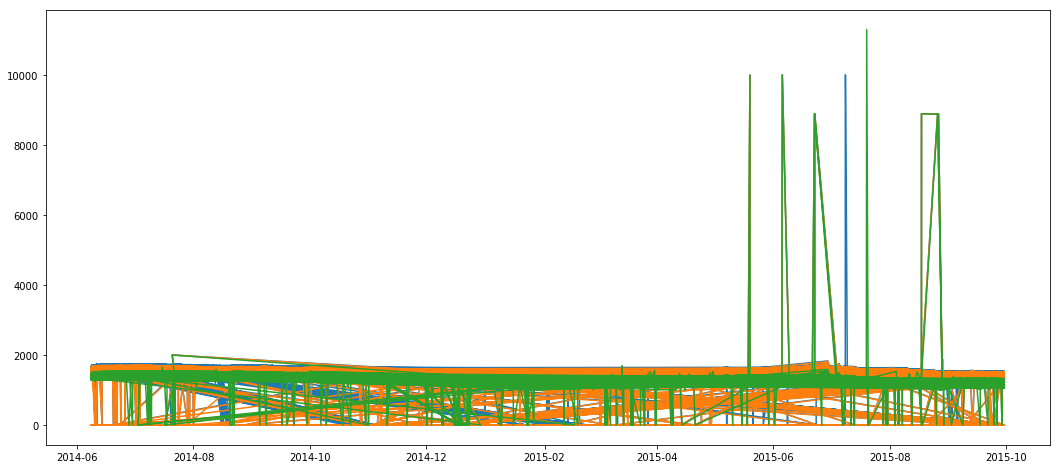

In [17]:
rcParams['figure.figsize'] = 18, 8 

plt.plot(df['E5'])

plt.plot(df['E10'])

plt.plot(df['DIESEL'])

#### Outliers in the Price , either need to remove or standardize the data for predictive model 

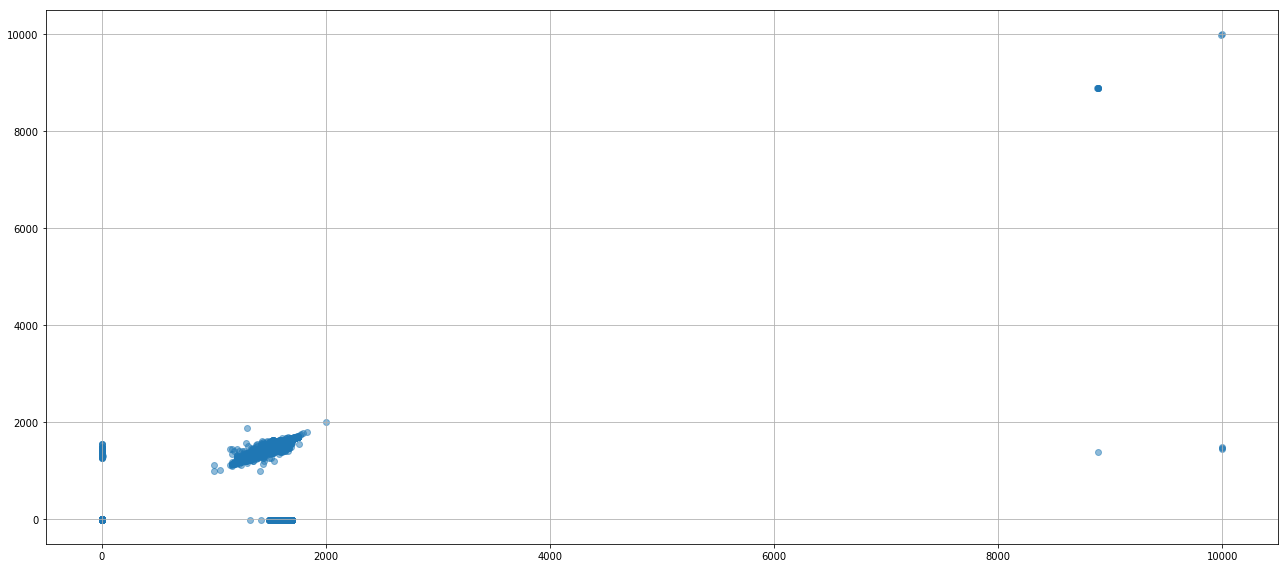

In [14]:
fig, ax = plt.subplots()
ax.scatter(df['E5'], df['E10'], alpha=0.5)


ax.grid(True)
fig.tight_layout()

plt.show()